In [128]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline


plt.rcParams['figure.figsize'] = (10,6)

# Exercise

## Heart

In this exercise we will use the heart attack dataset. Here are some information about the columns you will use:

> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
> 14. target variable 

Import the heart.csv dataset and have a look at it using head

In [113]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Check if there are missing values in the dataset (you can use isna and sum methods)

In [114]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

extract the target values in one variable and keep all the other columns in another variable

In [115]:
y = df["target"].copy()
X = df.drop("target", axis=1)

* Create a KMeans model
* Fit it to your dataset
* select 2 columns for the plots
* create a scatter plot to show your columns on the 2 axes colored by the cluster they belong to
* then on the same plot, add the centroids points
* finally create a second plot with the real data colored by their target values
* then try with different columns to find the best clusters

In [116]:
from sklearn.cluster import KMeans

model = ...

centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns=X.columns)

clusters = model.labels_

column1 = ...
column2 = ...

plt.figure(figsize=(10,6))
plt.scatter(..., ..., c= clusters, s=50, alpha=0.6)
plt.scatter(..., ..., c='red', s=100, marker="+", label="centroids")
plt.xlabel(column1)
plt.ylabel(column2)
plt.legend()
plt.title("Predicted clusters")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(..., ..., c= ..., s=50, alpha=0.8)
plt.title("Real heart attack")
plt.show()

AttributeError: 'ellipsis' object has no attribute 'cluster_centers_'

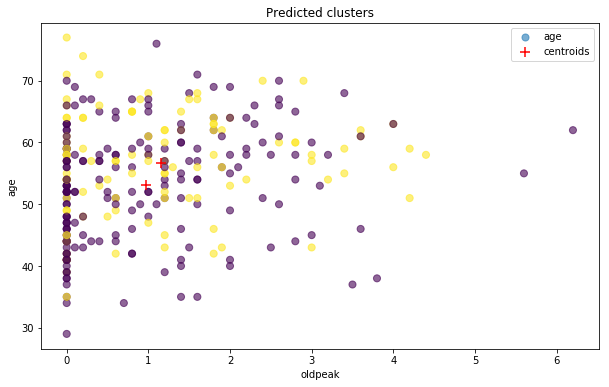

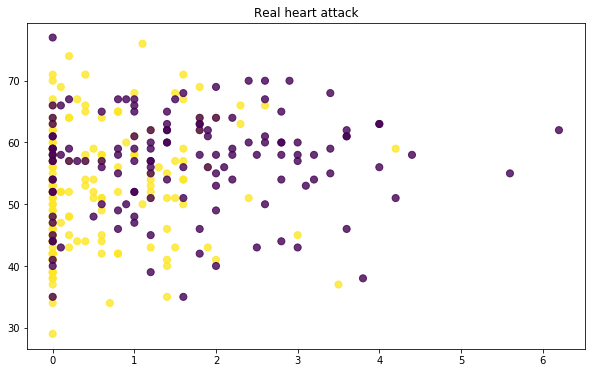

In [117]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(X)

centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns=X.columns)

clusters = model.labels_

column1 = "oldpeak"
column2 = "age"

plt.figure(figsize=(10,6))
plt.scatter(X[column1], X[column2], c= clusters, s=50, alpha=0.6)
plt.scatter(centroids.loc[:, column1], centroids.loc[:, column2], c='red', s=100, marker="+", label="centroids")
plt.xlabel(column1)
plt.ylabel(column2)
plt.legend()
plt.title("Predicted clusters")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(X[column1], X[column2], c= y, s=50, alpha=0.8)
plt.title("Real heart attack")
plt.show()

In [118]:
from sklearn.metrics import mutual_info_score, homogeneity_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix

print("Agreement with true labels = {:.1%}".format(mutual_info_score(clusters, y)))
print("Homogeneity with true labels = {:.1%}".format(homogeneity_score(clusters, y))) # [0,1] each cluster contains only members of a single class
print("Silhouette coefficient = {:.2}".format(silhouette_score(X, clusters, metric='euclidean'))) # [-1, 1] the higher, the more compact distinct clusters
display(contingency_matrix(clusters,y))

Agreement with true labels = 0.9%
Homogeneity with true labels = 1.4%
Silhouette coefficient = 0.39


array([[ 78, 115],
       [ 60,  50]])

## pokemon

In [119]:
df = pd.read_csv("../../../Data/data.csv")
df.head()

,num,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [120]:
list_to_drop = ["num", "Name", "Type 1", "Type 2"]
df.drop(list_to_drop, axis=1, inplace=True)

In [121]:
y = df["Legendary"].copy()
X = df.drop("Legendary", axis=1)
cols = X.columns

In [87]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X = pd.DataFrame(sc.fit_transform(X))
# X.columns = cols

In [122]:
df[df.Legendary].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231
std,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262
min,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000
25%,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000
50%,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000
75%,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000
max,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000


In [123]:
df[~df.Legendary].describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
std,106.760417,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038,1.673471
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,324.000000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,425.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000,3.000000
75%,498.000000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000,5.000000
max,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,6.000000


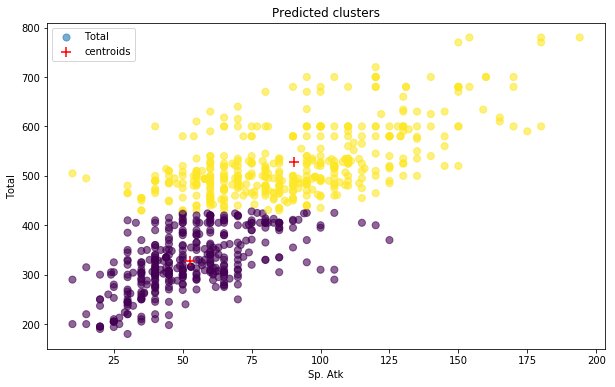

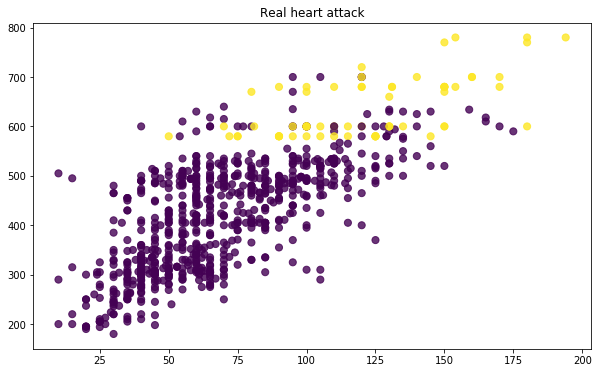

In [124]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(X)

centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns=X.columns)

clusters = model.labels_

column1 = "Sp. Atk"
column2 = "Total"

plt.figure(figsize=(10,6))
plt.scatter(X[column1], X[column2], c= clusters, s=50, alpha=0.6)
plt.scatter(centroids.loc[:, column1], centroids.loc[:, column2], c='red', s=100, marker="+", label="centroids")
plt.xlabel(column1)
plt.ylabel(column2)
plt.legend()
plt.title("Predicted clusters")
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(X[column1], X[column2], c= y, s=50, alpha=0.8)
plt.title("Real heart attack")
plt.show()

In [127]:
from sklearn.metrics import mutual_info_score, homogeneity_score, silhouette_score
from sklearn.metrics.cluster import contingency_matrix

print("Agreement with true labels = {:.1%}".format(mutual_info_score(clusters, y)))
print("Homogeneity with true labels = {:.1%}".format(homogeneity_score(clusters, y))) # [0,1] each cluster contains only members of a single class
print("Silhouette coefficient = {:.2}".format(silhouette_score(X, clusters, metric='euclidean'))) # [-1, 1] the higher, the more compact distinct clusters
display(contingency_matrix(clusters,y))

Agreement with true labels = 5.4%
Homogeneity with true labels = 7.8%
Silhouette coefficient = 0.49


array([[372,   0],
       [363,  65]])